# Comunicações e Processamento de Sinal (CPS)
## Semana 4 
## Modulações Digitais

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#np.random.seed(0)
#mensagem = np.array([0,1,1,0,1,0,0,1,1])
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size=None, dtype=int)
#Return random integers from `low` (inclusive) to `high` (exclusive).

In [72]:
mensagem

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

# PSK - Phase Shift Keying

$ s_1(t) = A \cos(2 \pi f_c t), 0< t < T_b$

$ s_0(t) = A \cos(2 \pi f_c t) = -A \cos(2 \pi f_c t), 0< t < T_b$

$ s_1(t) = A \phi(t) $

$ s_0(t) = -A \phi(t) $

$ \phi(t) = \cos(2 \pi f_c t), 0 < t < T_b $

In [75]:
#### CRIAR SINAL s0 e s1 que codificam bit 0 e bit 1 ####
#########################################################
fc = 400 #Hz
# Tb - tempo para transmitir 1 bit
Tb = 3 * 1/fc  # assumir 3 periodos da sinusoide
A = 2
Fs = 4000 # Fs >> 2 fmax -> Teo da Amostragem
t = np.arange(0,Tb, 1/Fs)
phi = np.cos(2*np.pi*fc*t)
Sinal1 = A * phi # sinal para o 1
Sinal0 = -A * phi  # sinal para o 0
N = len(t)

In [77]:
#plt.plot(Sinal0)
#plt.plot(Sinal1)
N

30

In [79]:
sinal = np.zeros(len(mensagem)*N) # array onde vamos guardar o sinal a enviar
for i in range(len(mensagem)):
    if mensagem[i] == 1:
        sinal[i*N:(i+1)*N] = Sinal1
    else:
        sinal[i*N:(i+1)*N] = Sinal0

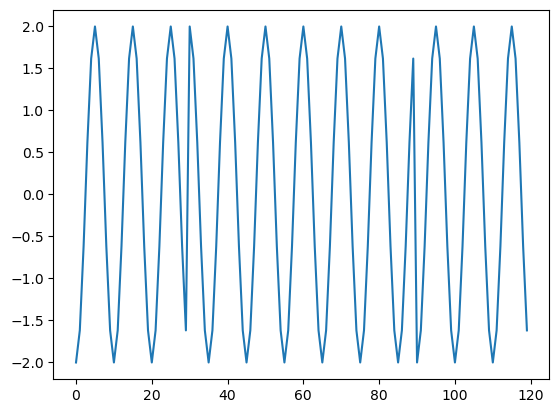

In [81]:
plt.plot(sinal[0:4*N])

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [84]:
desvioPadrao = 3
ruido = desvioPadrao*np.random.randn(len(sinal))

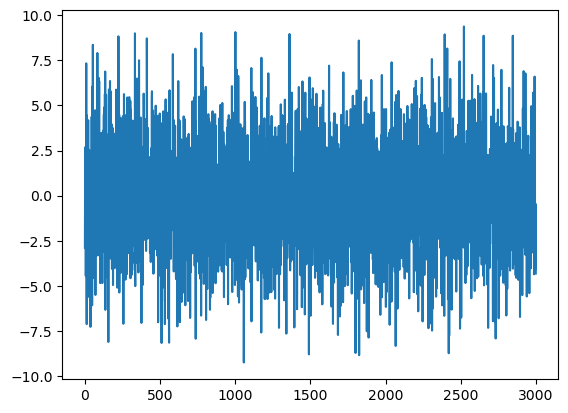

In [86]:
plt.plot(ruido)

In [88]:
np.mean(ruido)

-0.08469884269938893

In [90]:
np.std(ruido)

2.983653326266358

plt.hist(ruido, bins = 50)

In [93]:
y = sinal + ruido

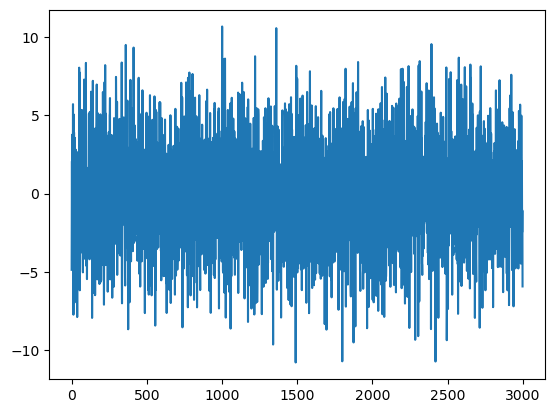

In [95]:
plt.plot(y)

# Receptor - Filtro Adaptado

In [98]:
decisoes = np.zeros(len(mensagem))
arrayMs = np.zeros(len(mensagem))
for indice in range(0,len(y),N):
    #print(indice)
    m = np.sum( y[indice:indice+N] * phi) #?!?!?! produto interno?
    #print(m)
    arrayMs[int(indice/N)] = m
    if m > 30:
        decisoes[int(indice/N)] = 1

(array([ 3.,  3.,  6., 10., 14.,  3.,  4.,  0.,  0.,  0.,  2.,  4.,  5.,
        10., 10.,  8.,  5.,  7.,  4.,  2.]),
 array([-51.76835552, -46.26997141, -40.7715873 , -35.27320319,
        -29.77481908, -24.27643497, -18.77805086, -13.27966675,
         -7.78128264,  -2.28289853,   3.21548558,   8.71386969,
         14.2122538 ,  19.71063791,  25.20902202,  30.70740613,
         36.20579024,  41.70417435,  47.20255846,  52.70094257,
         58.19932668]),
 <BarContainer object of 20 artists>)

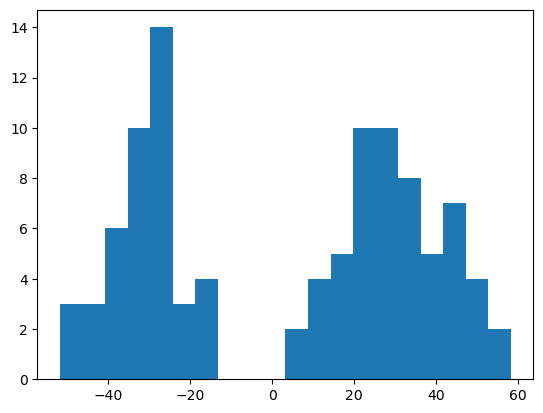

In [100]:
plt.hist(arrayMs,bins=20)

In [105]:
decisoes == mensagem

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True])

# Analise das Potencias

In [108]:
Ebit = np.sum((sinal[0:N]) ** 2)
Pbit = np.sum((sinal[0:N]) ** 2) / N
print("Energia:", Ebit, ", Potencia:", Pbit)

Energia: 59.99999999999999 , Potencia: 1.9999999999999998


In [112]:
Pruido = np.sum((ruido**2))/len(ruido)
print("PotenciaRuido: ", Pruido)

PotenciaRuido:  8.909361065294915


In [ ]:
SNR = Pbit/Pruido
SNR